In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data_src = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

dataframe = pd.read_csv(data_src, header=None, encoding='utf-8')


In [2]:

dataframe.tail()


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
# Select setosa and Versicolor
print(dataframe[4].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

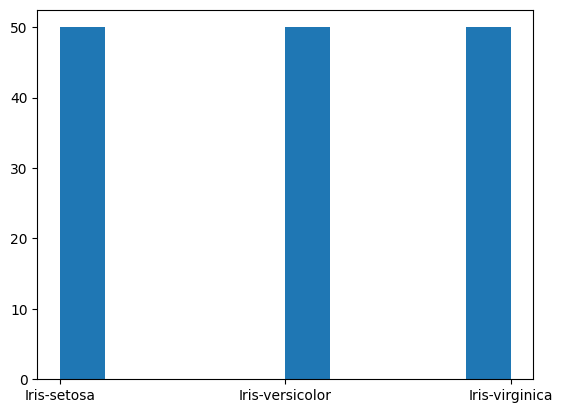

In [4]:
plt.hist(dataframe[4])

In [5]:
y = dataframe.iloc[:100,4].values # Select setosa and Versicolor data
y = np.where(y == "Iris-setosa", 0,1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
X = dataframe.iloc[:100, [0,2]].values # Extract sepal length and petal length
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

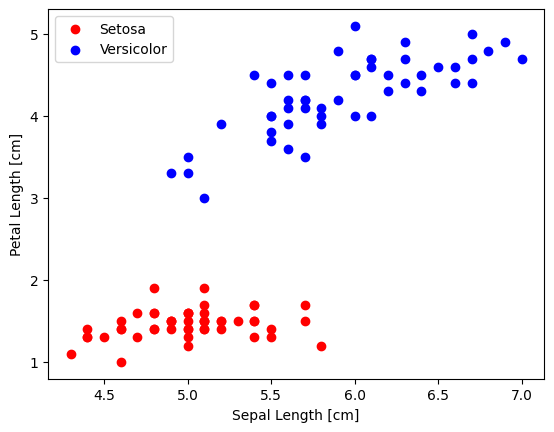

In [7]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1], c='red', marker='o', label = 'Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], c='blue', marker='o',  label= 'Versicolor')
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend()
plt.show()

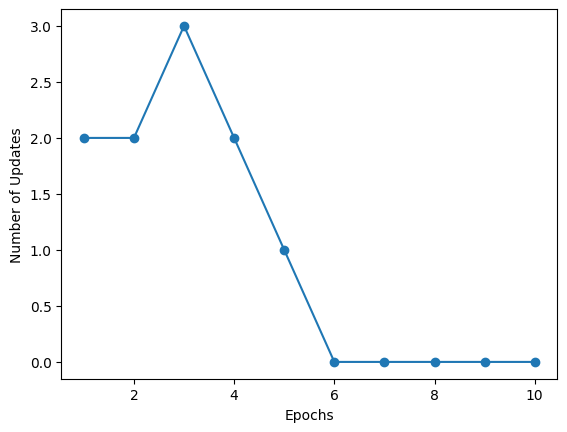

In [8]:
# Train our perceptron on the Iris data subset
from perceptron import *

ppn = Perceptron(lr=0.1, n_iters=10)
ppn.fit(X, y)
plt.plot(range(1,len(ppn.errors)+1), ppn.errors, marker = 'o')
plt.xlabel("Epochs")
plt.ylabel("Number of Updates")
plt.show()

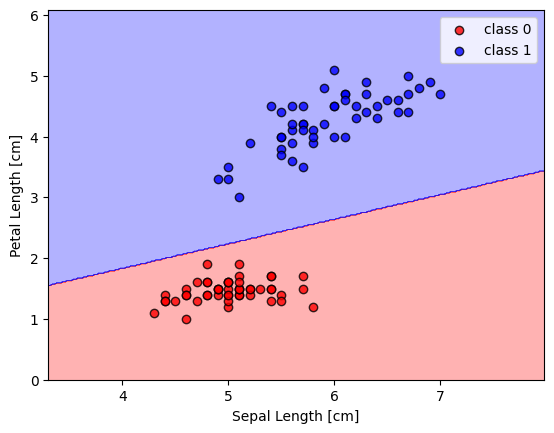

In [9]:
# Plotting Decision boundaries for 2-D datasets
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y, classifier, resolution = 0.02):
    # Setup marker generator and color map
    markers = ('o', 's', '^','<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:,1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha = 0.3, cmap= cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class Examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl, 0],
                    y = X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    label = f"class {cl}",
                    edgecolors='black')
        
plot_decision_regions(X,y, classifier=ppn)

plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend()
plt.show()